# **Training CNN model to predict Mask and No Mask(Image)**

# **Install Package**

In [ ]:
pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4MB 47kB/s 
     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 460kB 53.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
pip install keras==2.4.3

# Training **model**

In [ ]:
#import libraries
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

#for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow 

print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_path = "/content/drive/MyDrive/dataset/train"
validation_data_path = "/content/drive/MyDrive/dataset/valid"

In [ ]:
# show augmented images
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
# this is a generator that will read pictures found in
# at train_data_path,and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path,
                                                     target_size=(200,200),
                                                     batch_size=128,
                                                     class_mode='binary') 

Found 3659 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
#this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

#this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                               target_size=(200,200),
                                               batch_size=128,
                                               class_mode='binary')

Found 806 images belonging to 2 classes.


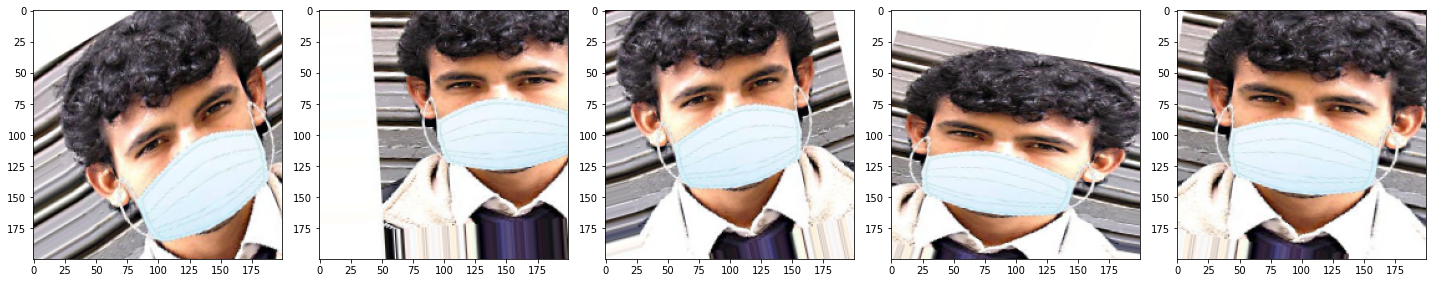

In [ ]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
#save best model using vall accuracy
model_path = '/content/drive/MyDrive/model/model.h5'
checkpoint = ModelCheckpoint(model_path,monitor='val_accuracy',verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]

In [ ]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                     keras.layers.MaxPooling2D(pool_size=(4,4)),
                                     keras.layers.Conv2D(filters=64, kernel_size=4),
                                     keras.layers.MaxPooling2D(pool_size=(3,3)),
                                     keras.layers.Conv2D(filters=128,kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=256, kernel_size=2),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(),
                                     keras.layers.Dense(units=128,activation='relu'),# input layers
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=2, activation='softmax') # output layer
                                     ])
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train cnn model
history = cnn_model.fit(training_data,
                        epochs=50,
                        verbose=1,
                        validation_data = valid_data,
                        callbacks=callbacks_list)

Epoch 1/50
 6/29 [=====>........................] - ETA: 2:11 - loss: 0.0872 - accuracy: 0.9753

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - ETA: 0s - loss: 0.1184 - accuracy: 0.9604
Epoch 00001: val_accuracy did not improve from 0.98511
29/29 [==============================] - 202s 7s/step - loss: 0.1184 - accuracy: 0.9604 - val_loss: 0.0675 - val_accuracy: 0.9702
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.1070 - accuracy: 0.9609
Epoch 00002: val_accuracy did not improve from 0.98511
29/29 [==============================] - 200s 7s/step - loss: 0.1070 - accuracy: 0.9609 - val_loss: 0.0749 - val_accuracy: 0.9764
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9552
Epoch 00003: val_accuracy did not improve from 0.98511
29/29 [==============================] - 204s 7s/step - loss: 0.1202 - accuracy: 0.9552 - val_loss: 0.0553 - val_accuracy: 0.9789
Epoch 4/50
29/29 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9650
Epoch 00004: val_accuracy did not improve from 0.98511
29/29 [==================

In [ ]:
cnn_model.save('/content/drive/MyDrive/model/model_lastest.h5')